# 2.Arbitary Value

### (fiil up the null values with random values)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import scikt Learn Libraries


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

##### import dataset


In [3]:
df =pd.read_csv('titanic_toy.csv')
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


### Perform Train Test Split


In [5]:
x = df.drop(columns=['Survived']) # droping Survibed category because it is 100% filled data there is no need to mean or median
y= df['Survived']

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### Create new column & impute missing values


In [7]:
x_train['Age_99'] = x_train['Age'].fillna(99) # fill null value with with 99 in age column
x_train['Age_minus1'] = x_train['Age'].fillna(-1)

x_train['Fare_99'] = x_train['Fare'].fillna(99)
x_train['Fare_minus1'] = x_train['Fare'].fillna(-1)

In [16]:
x_train.sample(8)

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
776,NaN,7.7500,0,99.0,-1.0,7.7500,7.7500
709,NaN,15.2458,2,99.0,-1.0,15.2458,15.2458
797,31.0,8.6833,0,31.0,31.0,8.6833,8.6833
239,33.0,12.2750,0,33.0,33.0,12.2750,12.2750
86,16.0,34.3750,4,16.0,16.0,34.3750,34.3750
133,29.0,NaN,1,29.0,29.0,99.0000,-1.0000
50,7.0,39.6875,5,7.0,7.0,39.6875,39.6875
175,18.0,7.8542,2,18.0,18.0,7.8542,7.8542


### Review Variance


In [21]:
print("Original Age variable", x_train['Age'].var())
print("Age Variance after Age_99 variable", x_train['Age_99'].var())
print("Age Variance after Age_minus1 variable", x_train['Age_minus1'].var())

print("Original Fare variable", x_train['Fare'].var())
print("Fare Variance after Fare_99 variable", x_train['Fare_99'].var())
print("Fare Variance after Fare_minus1 variable", x_train['Fare_minus1'].var())

Original Age variable 204.34951339046142
Age Variance after Age_99 variable 951.7275570187188
Age Variance after Age_minus1 variable 318.0896202624488
Original Fare variable 2448.1979137063163
Fare Variance after Fare_99 variable 2536.0773428319703
Fare Variance after Fare_minus1 variable 2378.5676784883494


## Reviw in Distribution in Age


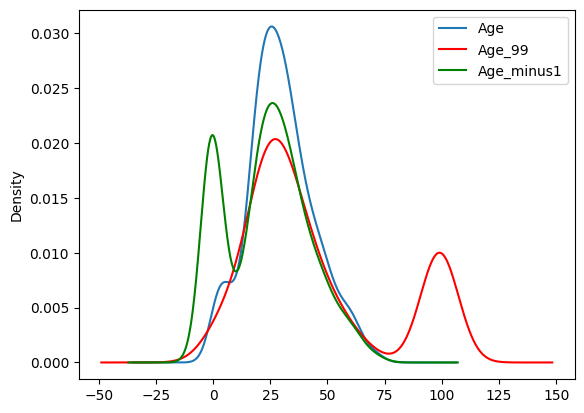

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original Age variable distribution
x_train['Age'].plot(kind='kde',ax=ax)

# variable imputed with the Age_99
x_train['Age_99'].plot(kind='kde',ax=ax,color='red')

# variable imputed with the Age_minus1
x_train['Age_minus1'].plot(kind='kde',ax=ax,color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Change in Distribution in Fare


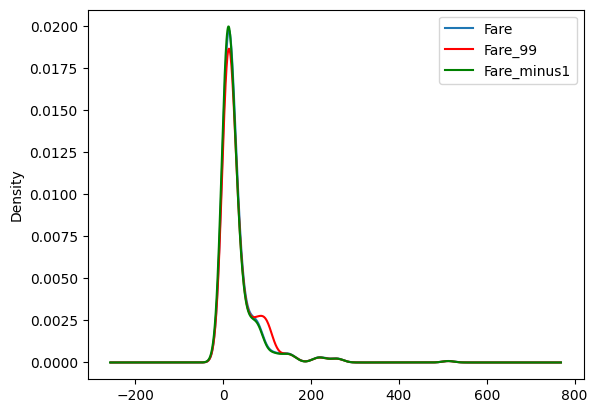

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original Fare variable distribution
x_train['Fare'].plot(kind='kde',ax=ax)

# variable imputed with the Fare_99
x_train['Fare_99'].plot(kind='kde',ax=ax,color='red')

# variable imputed with the Fare_minus1
x_train['Fare_minus1'].plot(kind='kde',ax=ax,color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Check covariance


In [26]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


### Check correlation


In [25]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514
Fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000


## Box Plot For Age


<Axes: >

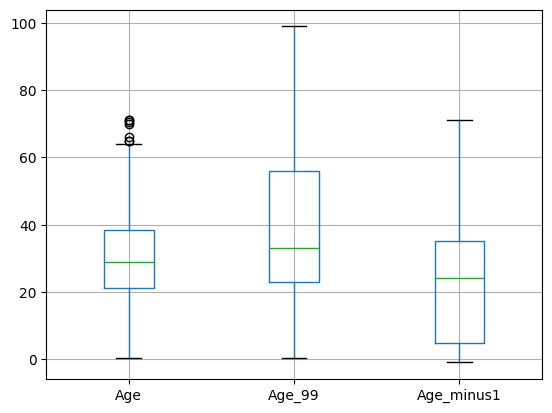

In [28]:
x_train[['Age','Age_99','Age_minus1']].boxplot()

## Box Plot For Fare


<Axes: >

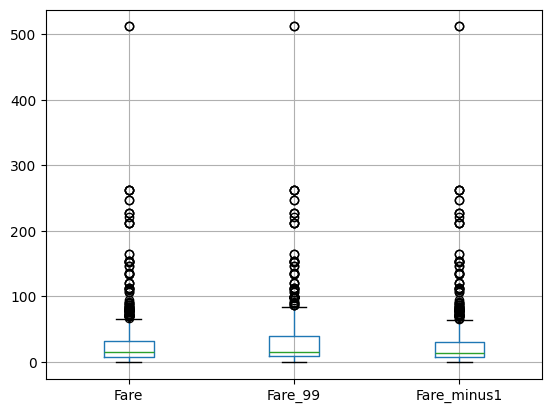

In [29]:
x_train[['Fare','Fare_99','Fare_minus1']].boxplot()